# Author : Sandaru Malshan
# Peer Reviewer :[]
# Date of peer Review:[]

I used and adapted code snippets from Tutorials week 3,4,6 and 7

In [1]:
# installing the data manipulations library
!pip install pandas

## Load the Dataset

In [2]:
import pandas as pd
print("===========================================================")
print("Load the Classification dataset (from Notebook 1)")
print("===========================================================")

df = pd.read_csv('/content/classification_dataset.csv')

# Display basic info
df.head()

Load the Classification dataset (from Notebook 1)


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,1,0,0,0,1,3,1,4.0,1,1,24.0,1,0
1,50.0,1,1,1,2,0,2,1,35.0,1,1,14.0,5,0
2,58.0,1,2,2,4,0,2,1,63.0,1,1,14.0,7,0
3,58.0,1,0,0,0,1,3,1,18.0,1,1,2.0,1,0
4,47.0,1,1,0,1,1,3,1,41.0,1,1,3.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3723 non-null   float64
 1   Sex                     3723 non-null   int64  
 2   T_Stage                 3723 non-null   int64  
 3   N_Stage                 3723 non-null   int64  
 4   6th_Stage               3723 non-null   int64  
 5   Differentiated          3723 non-null   int64  
 6   Grade                   3723 non-null   int64  
 7   A_Stage                 3723 non-null   int64  
 8   Tumor_Size              3723 non-null   float64
 9   Estrogen_Status         3723 non-null   int64  
 10  Progesterone_Status     3723 non-null   int64  
 11  Regional_Node_Examined  3723 non-null   float64
 12  Reginol_Node_Positive   3723 non-null   int64  
 13  Mortality_Status        3723 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 4

In [4]:
df.describe()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,54.061510,0.995165,0.703465,0.401558,1.224819,0.691378,2.142358,0.980929,26.846898,0.937416,0.830513,13.839377,3.860596,0.142627
std,8.945667,0.069374,0.707415,0.667965,1.228231,1.022634,0.636637,0.136792,15.006740,0.242246,0.375232,7.356580,4.660668,0.349739
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,15.000000,1.000000,1.000000,9.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,23.000000,1.000000,1.000000,13.000000,2.000000,0.000000
75%,62.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,35.000000,1.000000,1.000000,18.000000,4.000000,0.000000
max,69.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,70.000000,1.000000,1.000000,35.000000,34.000000,1.000000


##Selecting Feature

In [5]:
# Define target and features
X = df.drop("Mortality_Status", axis=1)
y = df["Mortality_Status"]

print("==== x data ====")
print(X.head())
print("\n==== y data ====\n")
print(y.head())


==== x data ====
    Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  68.0    1        0        0          0               1      3        1   
1  50.0    1        1        1          2               0      2        1   
2  58.0    1        2        2          4               0      2        1   
3  58.0    1        0        0          0               1      3        1   
4  47.0    1        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0         4.0                1                    1                    24.0   
1        35.0                1                    1                    14.0   
2        63.0                1                    1                    14.0   
3        18.0                1                    1                     2.0   
4        41.0                1                    1                     3.0   

   Reginol_Node_Positive  
0                 

### Divide data set training and testing

In [6]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build Base Learners & Ensemble

### soft Voting

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Base learners
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=18)

# Voting Ensemble
ensemble = VotingClassifier(estimators=[('lr', lr),('nb', nb)], voting='soft')

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)

### Evaluation

[[857 101]
 [105  54]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       958
           1       0.35      0.34      0.34       159

    accuracy                           0.82      1117
   macro avg       0.62      0.62      0.62      1117
weighted avg       0.81      0.82      0.81      1117



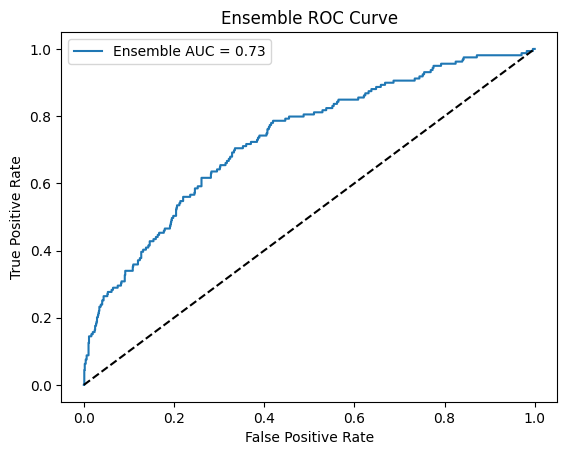

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

# AUC-ROC
y_proba = ensemble.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'Ensemble AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.legend()
plt.show()


### Hard Voting

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Base learners
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=18)
nb = GaussianNB()

# Hard Voting Ensemble
ensemble_hard = VotingClassifier(estimators=[('lr', lr),('nb', nb)], voting='hard')

# Fit model
ensemble_hard.fit(X_train_scaled, y_train)

# Predict
y_pred_ensemble_hard = ensemble_hard.predict(X_test_scaled)

### Evaluation

Confusion Matrix:
[[948  10]
 [140  19]]


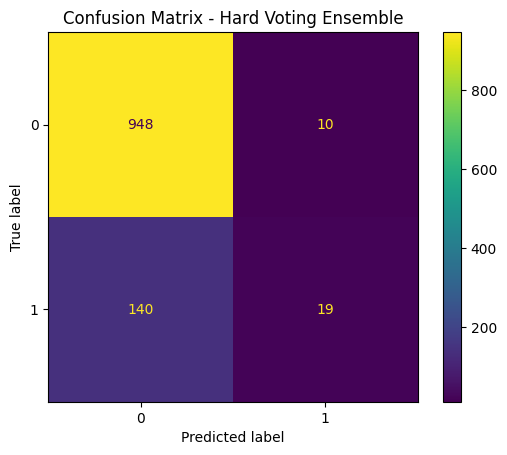


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       958
           1       0.66      0.12      0.20       159

    accuracy                           0.87      1117
   macro avg       0.76      0.55      0.56      1117
weighted avg       0.84      0.87      0.82      1117



In [11]:
# Classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_ensemble_hard)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Hard Voting Ensemble")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble_hard))


# Part B: Decision Tree Regression for Survival_Months

## Load Regression Dataset

In [12]:
import pandas as pd
print("===========================================================")
print("Load the Regression dataset (from Notebook 1)")
print("===========================================================")

data_frame = pd.read_csv('/content/regression_dataset.csv')

# Display basic info
data_frame.head()

Load the Regression dataset (from Notebook 1)


,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,40.0,30.0,9.0,1,14
1,68.0,13.0,9.0,1,64
2,57.0,70.0,12.0,12,42
3,42.0,9.0,15.0,2,39
4,67.0,13.0,16.0,3,60


In [17]:
list(data_frame.columns)

['Age',
 'Tumor_Size',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [15]:
print("Shape",data_frame.shape)

Shape (531, 5)


### Selecting Feature

In [22]:
# Define target and features
X = data_frame.drop("Survival_Months", axis=1)
y = data_frame["Survival_Months"]

print("==== x data ====")
print(X.head())
print("\n==== y data ====\n")
print(y.head())

==== x data ====
    Age  Tumor_Size  Regional_Node_Examined  Reginol_Node_Positive
0  40.0        30.0                     9.0                      1
1  68.0        13.0                     9.0                      1
2  57.0        70.0                    12.0                     12
3  42.0         9.0                    15.0                      2
4  67.0        13.0                    16.0                      3

==== y data ====

0    14
1    64
2    42
3    39
4    60
Name: Survival_Months, dtype: int64


### Divide data set training and testing

In [23]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Import and Fit Decision Tree Regressors

In [24]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Fully grown tree (DT-1)
dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train, y_train)

# Pruned tree (DT-2)
dt2 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

## Visualize the Trees

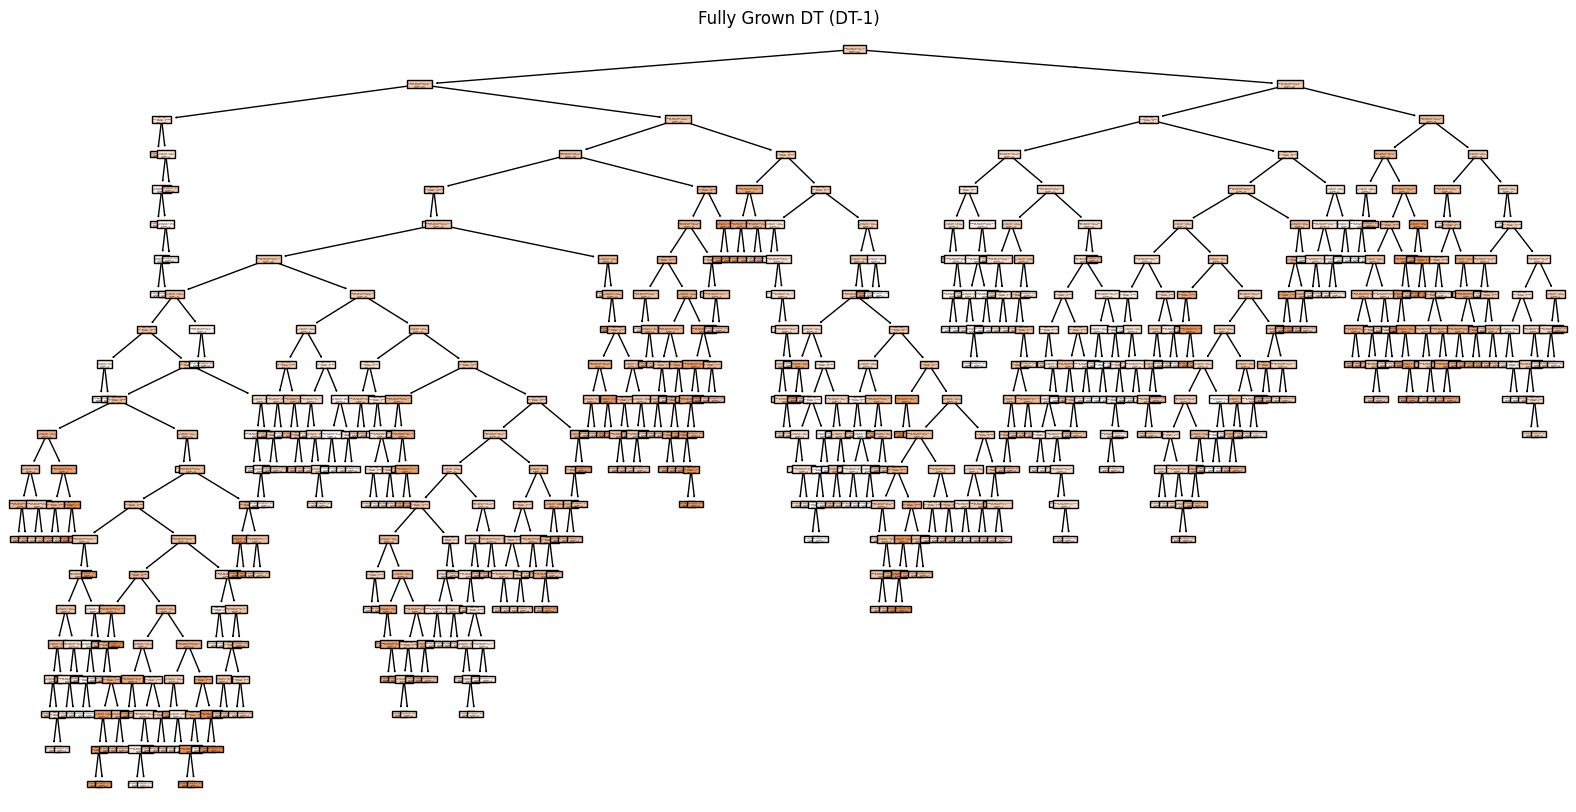

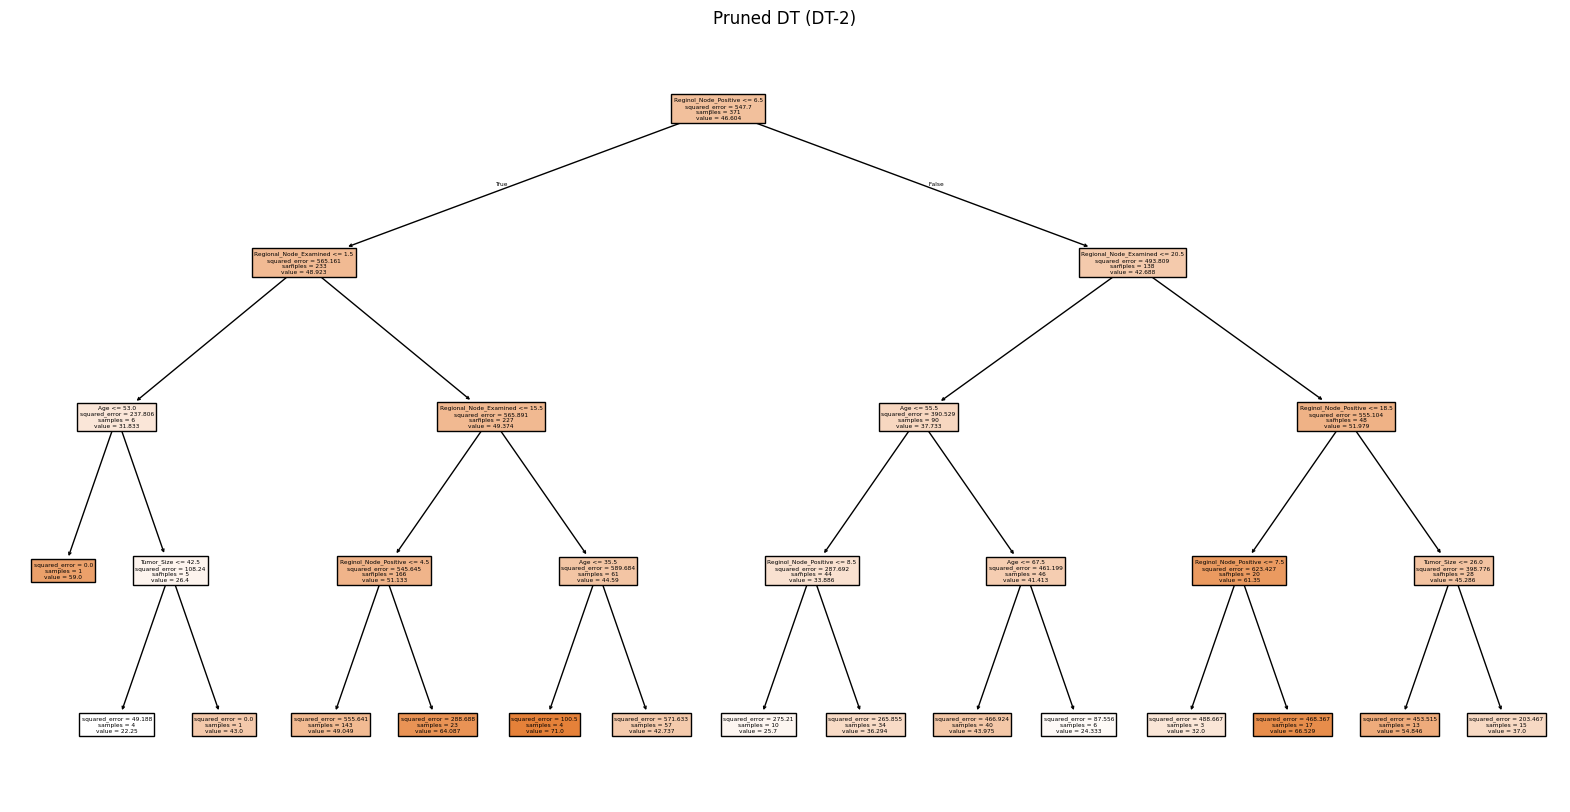

In [25]:
# Visualize DT-1
plt.figure(figsize=(20, 10))
plot_tree(dt1, filled=True, feature_names=X.columns)
plt.title("Fully Grown DT (DT-1)")
plt.show()

# Visualize DT-2
plt.figure(figsize=(20, 10))
plot_tree(dt2, filled=True, feature_names=X.columns)
plt.title("Pruned DT (DT-2)")
plt.show()


## Evaluate Both Models:MAE, MSE, RMSE, R²

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_dt(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))
    print("------")

evaluate_dt(dt1, "DT-1 (Fully Grown)")
evaluate_dt(dt2, "DT-2 (Pruned)")

DT-1 (Fully Grown) Evaluation:
MSE: 1148.29375
MAE: 28.23125
R2: -1.0330171503697754
------
DT-2 (Pruned) Evaluation:
MSE: 634.3000931710652
MAE: 21.0522100306954
R2: -0.12300791317371718
------


In [30]:
# new_patients
new_patients = pd.DataFrame({'Age': [55],
    'Tumor_Size': [20],
    'Regional_Node_Examined': [12],
    'Reginol_Node_Positive': [1]}, index=[0])
survival_months = dt1.predict(new_patients)
print("Predicted Survival Months:", survival_months[0])

Predicted Survival Months: 71.0


In [34]:
# new_patients
new_patients = pd.DataFrame({'Age': [55],
    'Tumor_Size': [20],
    'Regional_Node_Examined': [12],
    'Reginol_Node_Positive': [1]}, index=[0])
survival_months = dt2.predict(new_patients)
print("Predicted Survival Months:", survival_months[0])

Predicted Survival Months: 49.04895104895105


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train RF
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate RF
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))
    print("-" * 50)

evaluate_model(rf, "Random Forest Regressor")

Random Forest Regressor Evaluation:
MSE: 617.0853675000001
MAE: 20.383625000000002
R2: -0.09252979507180603
--------------------------------------------------


In [33]:
# Predict for a new patient
new_patient = pd.DataFrame({
    'Age': [55],
    'Tumor_Size': [20],
    'Regional_Node_Examined': [12],
    'Reginol_Node_Positive': [1]
})

# Predict
predicted = rf.predict(new_patient)
print(" Predicted Survival Months:", predicted[0])

 Predicted Survival Months: 52.22


# Summary

- Gradient Boosting had the best R² score and lowest RMSE.
- Feature importance analysis showed [insert top 3 features] as most influential.
- Further improvements can include hyperparameter tuning and ensemble stacking.
